In [1]:
import math
# import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.data.experimental import AUTOTUNE as AUTO

In [3]:
data_csv = pd.read_csv('data\usd_inr.csv')

In [4]:
data_csv.set_index(['Date'], inplace=True)

In [5]:
data_csv.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
30-05-2023,82.665,82.557,82.794,82.548,0,0.0010
29-05-2023,82.586,82.591,82.682,82.511,0,0.0002
26-05-2023,82.570,82.745,82.748,82.542,0,-0.0020
25-05-2023,82.733,82.680,82.821,82.666,0,0.0008
24-05-2023,82.670,82.880,82.897,82.570,0,-0.0019


In [6]:
data_csv.drop(columns=['Volume'],axis=1,inplace=True)

In [44]:
data_csv = data_csv.iloc[::-1]
data_csv.head(10)

,Price,Open,High,Low,Chg%
Date,,,,,
01-01-2010,46.615,46.610,46.677,46.590,0.0044
04-01-2010,46.295,46.545,46.655,46.245,-0.0069
05-01-2010,46.205,46.305,46.305,46.045,-0.0019
06-01-2010,45.695,46.165,46.205,45.695,-0.0110
07-01-2010,45.650,45.610,45.890,45.570,-0.0010
08-01-2010,45.470,45.680,45.900,45.470,-0.0039
11-01-2010,45.260,45.510,45.510,45.230,-0.0046
12-01-2010,45.660,45.140,45.750,45.100,0.0088
13-01-2010,45.495,45.735,45.775,45.415,-0.0036


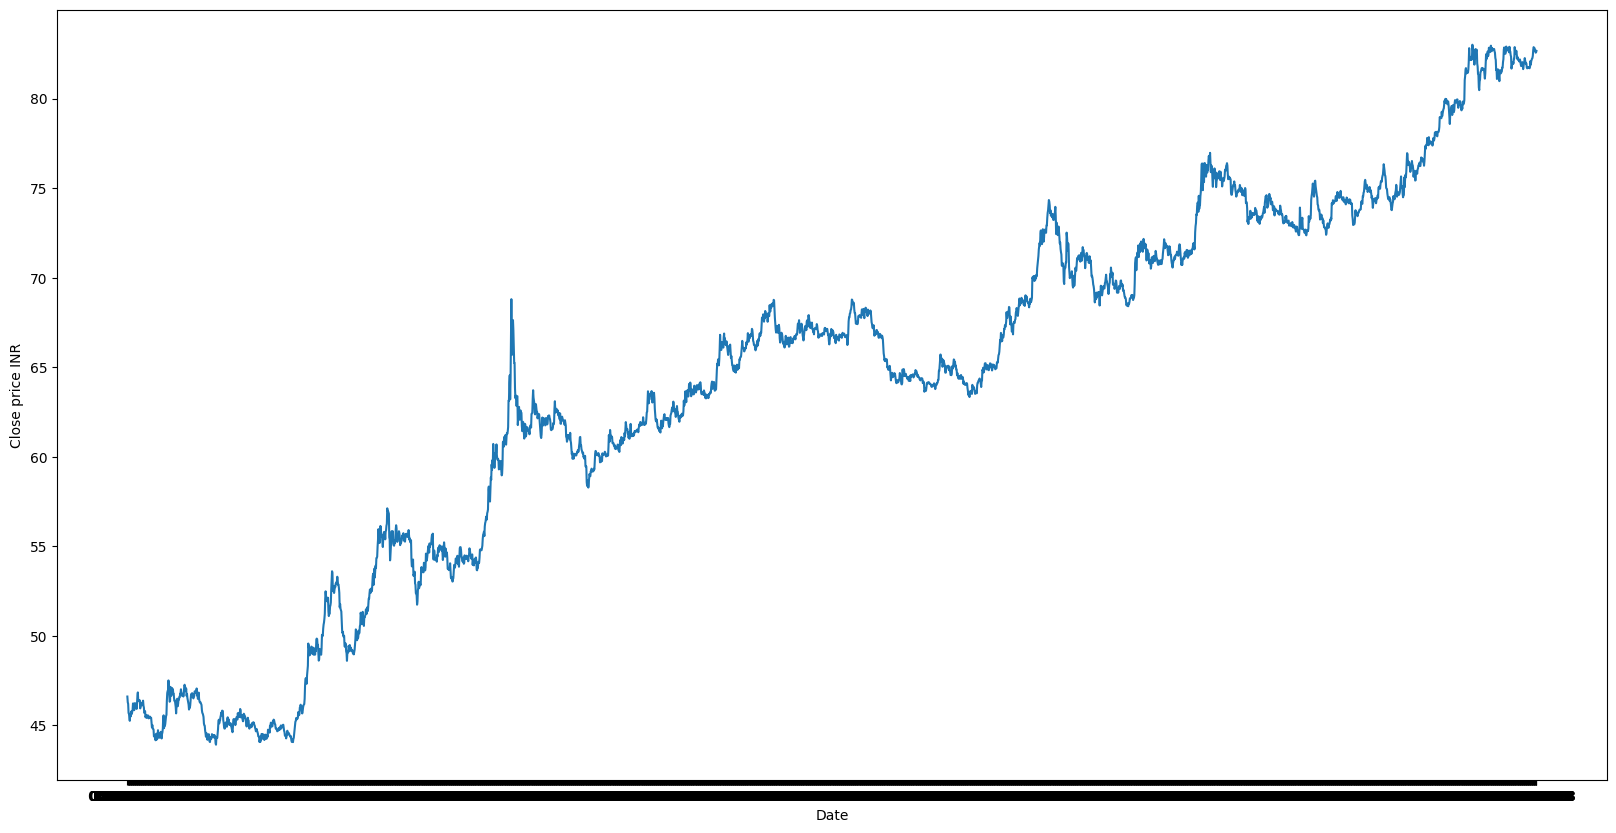

In [12]:
plt.figure(figsize=(20,10))
plt.plot(data_csv['Price'])
plt.xlabel('Date')
plt.ylabel('Close price INR')
plt.show()

In [8]:
data_csv.to_csv('usd_inr_processed.csv')

In [9]:
target = data_csv['Price']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(target.values.reshape(-1, 1))

In [11]:
scaled_data

array([[0.06881907],
       [0.06063242],
       [0.05832992],
       ...,
       [0.9886666 ],
       [0.98907593],
       [0.99109701]])

In [12]:
sequence_length = 10  # Length of input sequences
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

In [13]:
X

array([[0.06881907, 0.06063242, 0.05832992, ..., 0.04438702, 0.04016578,
        0.04285203],
       [0.06063242, 0.05832992, 0.04528244, ..., 0.04016578, 0.04285203,
        0.04771285],
       [0.05832992, 0.04528244, 0.04413119, ..., 0.04285203, 0.04771285,
        0.04400327],
       ...,
       [0.97851003, 0.98014736, 0.98083811, ..., 0.99531826, 0.99122493,
        0.99283668],
       [0.98014736, 0.98083811, 0.98431744, ..., 0.99122493, 0.99283668,
        0.9886666 ],
       [0.98083811, 0.98431744, 0.99250409, ..., 0.99283668, 0.9886666 ,
        0.98907593]])

In [14]:
y

array([0.04771285, 0.04400327, 0.04694535, ..., 0.9886666 , 0.98907593,
       0.99109701])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [21]:
X_train.shape, X_test.shape

((2790, 10, 1), (698, 10, 1))

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
88/88 [==============================] - 6s 9ms/step - loss: 0.0116
Epoch 2/50
88/88 [==============================] - 1s 9ms/step - loss: 2.1943e-04
Epoch 3/50
88/88 [==============================] - 1s 10ms/step - loss: 2.1542e-04
Epoch 4/50
88/88 [==============================] - 1s 10ms/step - loss: 2.0746e-04
Epoch 5/50
88/88 [==============================] - 1s 10ms/step - loss: 2.1111e-04
Epoch 6/50
88/88 [==============================] - 1s 10ms/step - loss: 2.0740e-04
Epoch 7/50
88/88 [==============================] - 1s 9ms/step - loss: 2.1842e-04
Epoch 8/50
88/88 [==============================] - 1s 10ms/step - loss: 2.1270e-04
Epoch 9/50
88/88 [==============================] - 1s 10ms/step - loss: 2.0911e-04
Epoch 10/50
88/88 [==============================] - 1s 9ms/step - loss: 2.0943e-04
Epoch 11/50
88/88 [==============================] - 1s 10ms/step - loss: 2.0795e-04
Epoch 12/50
88/88 [==============================] - 1s 10ms/step - loss: 1.9750e-

In [17]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

22/22 [==============================] - 0s 4ms/step


In [18]:
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

In [19]:
train_rmse = np.sqrt(np.mean((train_predictions - y_train) ** 2))
test_rmse = np.sqrt(np.mean((test_predictions - y_test) ** 2))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 12.761907428160972
Test RMSE: 5.0214599677736755


In [26]:
predicted_df = pd.DataFrame({
    'Date': data_csv.index[sequence_length:sequence_length + len(train_predictions) + len(test_predictions)],
    'Predicted': np.concatenate([train_predictions.flatten(), test_predictions.flatten()])
})
predicted_df

,Date,Predicted
0,15-01-2010,45.423172
1,18-01-2010,45.482662
2,19-01-2010,45.530701
3,20-01-2010,45.587795
4,21-01-2010,45.648777
...,...,...
3483,24-05-2023,82.339409
3484,25-05-2023,82.310898
3485,26-05-2023,82.282951
3486,29-05-2023,82.205612


In [27]:
# Create a new DataFrame with date and predicted values
test_predicted_df = pd.DataFrame({
    'Date': data_csv.index[sequence_length + len(train_predictions):sequence_length + len(train_predictions) + len(test_predictions)],
    'Predicted': test_predictions.flatten()
})


In [28]:
test_predicted_df

,Date,Predicted
0,25-09-2020,73.259804
1,28-09-2020,73.295692
2,29-09-2020,73.325745
3,30-09-2020,73.347618
4,01-10-2020,73.299683
...,...,...
693,24-05-2023,82.339409
694,25-05-2023,82.310898
695,26-05-2023,82.282951
696,29-05-2023,82.205612


In [33]:
test_predicted_df.to_csv('test_predicted_df.csv')

In [30]:
test_predicted_df_with_actual = pd.DataFrame({
    'Date': data_csv.index[sequence_length + len(train_predictions):sequence_length + len(train_predictions) + len(test_predictions)],
    'Predicted': test_predictions.flatten(),
    'Actual': y_test.flatten()
})

In [31]:
test_predicted_df_with_actual

,Date,Predicted,Actual
0,25-09-2020,73.259804,73.670
1,28-09-2020,73.295692,73.750
2,29-09-2020,73.325745,73.750
3,30-09-2020,73.347618,73.560
4,01-10-2020,73.299683,73.193
...,...,...,...
693,24-05-2023,82.339409,82.670
694,25-05-2023,82.310898,82.733
695,26-05-2023,82.282951,82.570
696,29-05-2023,82.205612,82.586


KeyError: 'Actual'

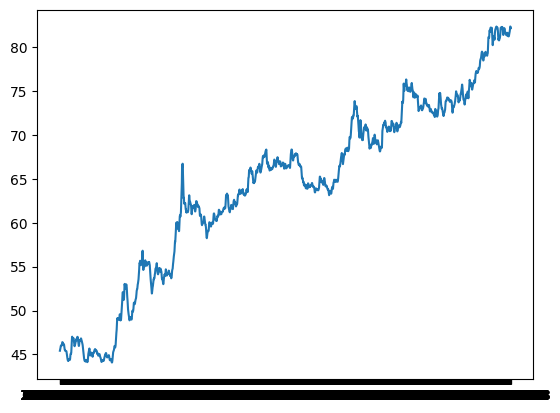

In [35]:
plt.plot(predicted_df['Date'], predicted_df['Predicted'], label='Predicted')
plt.plot(predicted_df['Date'], predicted_df['Actual'], label='Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Test Predictions vs Actual Values')
plt.legend()
plt.show()


In [32]:
test_predicted_df_with_actual.to_csv('test_predicted_df_with_actual.csv')

In [38]:
# Create a new DataFrame with date, predicted values, and actual values for training and testing data
all_predicted_with_actual_df = pd.DataFrame({
    'Date': np.concatenate((data_csv.index[sequence_length:sequence_length + len(train_predictions)], data_csv.index[sequence_length + len(train_predictions):sequence_length + len(train_predictions) + len(test_predictions)])),
    'Predicted': np.concatenate((train_predictions.flatten(), test_predictions.flatten())),
    'Actual': np.concatenate((y_train.flatten(), y_test.flatten()))
})


In [40]:
len(all_predicted_with_actual_df)

3488

In [41]:
len(data_csv)

3498

In [42]:
all_predicted_with_actual_df.to_csv('all_predicted_with_actual_df.csv')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

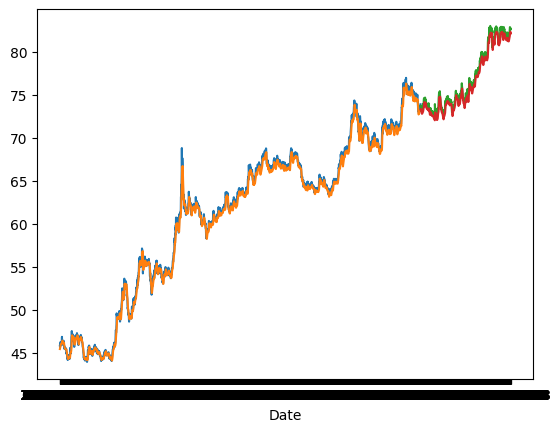

In [30]:
plt.plot(data_csv.index[sequence_length:sequence_length+len(train_predictions)], y_train.flatten(), label='Actual Train')
plt.plot(data_csv.index[sequence_length:sequence_length+len(train_predictions)], train_predictions.flatten(), label='Predicted Train')
plt.plot(data_csv.index[sequence_length+len(train_predictions):sequence_length+len(train_predictions)+len(test_predictions)], y_test.flatten(), label='Actual Test')
plt.plot(data_csv.index[sequence_length+len(train_predictions):sequence_length+len(train_predictions)+len(test_predictions)], test_predictions.flatten(), label='Predicted Test')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('LSTM Forex Forecast')
plt.legend()
plt.show()


In [34]:
model.save('forex_model.h5')

In [2]:
import tensorflow as tf
# from keras.model import load_weights
model = tf.keras.models.load_model('models\forex_model.h5')